In [1]:
import nltk
import spacy
from nltk.corpus import stopwords   
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
#from datasets import load_dataset
import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os



In [7]:
file_path = '../nlp_news/clean_cnn_chunk_0.csv'
data = pd.read_csv(file_path)


In [8]:
#Lets do a deep dive in data and analyze both articles and summaries using various NLP techniques
#Lets start with simple EDA on data

#change printing options for pandas to visualize the data
pd.set_option('display.max_colwidth', None)
data.head(5)


id  \
0  42c027e4ff9730fbb3de84c1af0d2c506e41c3e4   
1  ee8871b15c50d0db17b0179a6d2beab35065f1e9   
2  06352019a19ae31e527f37f7571c6dd7f0c5da37   
3  24521a2abb2e1f5e34e6824e0f9e56904a2b0e88   
4  7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [9]:
# lets now print the number of words in both of the columns articles and summary
data = data.dropna()
data['article_len'] = data['article'].apply(lambda x: len(str(x).split()))
data['summary_len'] = data['summary'].apply(lambda x: len(str(x).split()))

#print the min max avg of lens
print('Article Length')
print('Min: ', data['article_len'].min())
print('Max: ', data['article_len'].max())
print('Mean: ', data['article_len'].mean())
print('Summary Length')
print('Min: ', data['summary_len'].min())
print('Max: ', data['summary_len'].max())
print('Mean: ', data['summary_len'].mean())


Article Length
Min:  14
Max:  1864
Mean:  609.2017069630075
Summary Length
Min:  10
Max:  84
Mean:  41.897732392251086


In [10]:
# now lets do some text analysis
# lets start with tokenization

# Tokenization
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

data['article_tokens'] = data['article'].apply(lambda x: tokenization(str(x)))
data['summary_tokens'] = data['summary'].apply(lambda x: tokenization(str(x)))

# lets print the tokenized data

print('Article Tokens')
print(data['article_tokens'].head())
print('Summary Tokens')
print(data['summary_tokens'].head())


Article Tokens
0                                                                                    [london, england, reuters, harry, potter, star, daniel, radcliffe, gains, access, to, a, reported, 20, million, 411, million, fortune, as, he, turns, 18, on, monday, but, he, insists, the, money, wont, cast, a, spell, on, him, daniel, radcliffe, as, harry, potter, in, harry, potter, and, the, order, of, the, phoenix, to, the, disappointment, of, gossip, columnists, around, the, world, the, young, actor, says, he, has, no, plans, to, fritter, his, cash, away, on, fast, cars, drink, and, celebrity, parties, i, dont, plan, to, be, one, of, those, people, who, as, soon, as, they, turn, 18, suddenly, buy, themselves, a, massive, sports, ...]
1                   [editors, note, in, our, behind, the, scenes, series, cnn, correspondents, share, their, experiences, in, covering, news, and, analyze, the, stories, behind, the, events, here, soledad, obrien, takes, users, inside, a, jail, where, man

In [11]:


# Display basic information about the dataset
data_info = data.info()
#drop any null valued row
data = data.dropna()
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39954 entries, 0 to 40120
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              39954 non-null  object
 1   article         39954 non-null  object
 2   summary         39954 non-null  object
 3   article_len     39954 non-null  int64 
 4   summary_len     39954 non-null  int64 
 5   article_tokens  39954 non-null  object
 6   summary_tokens  39954 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 39954 entries, 0 to 40120
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              39954 non-null  object
 1   article         39954 non-null  object
 2   summary         39954 non-null  object
 3   article_len     39954 non-null  int64 
 4   summary_len     39954 non-null  int64 
 5   article_tokens  39954 non-null  obj

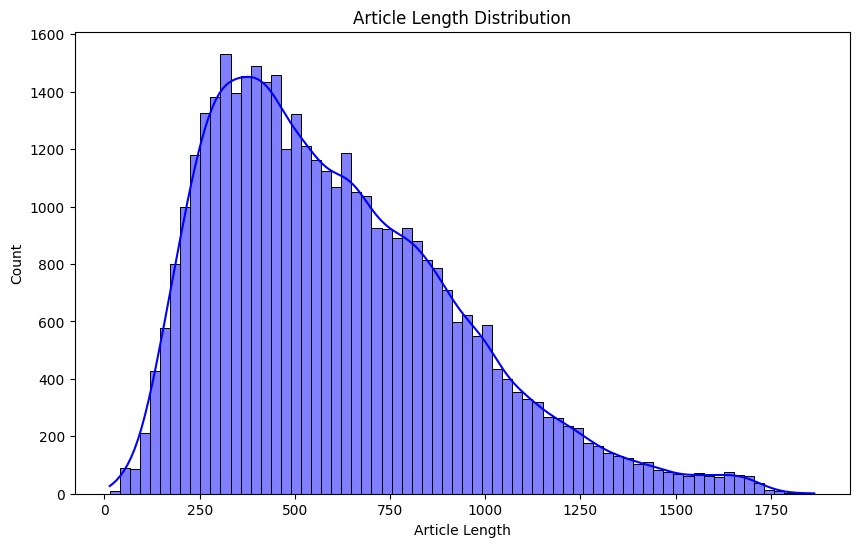

<Figure size 640x480 with 0 Axes>

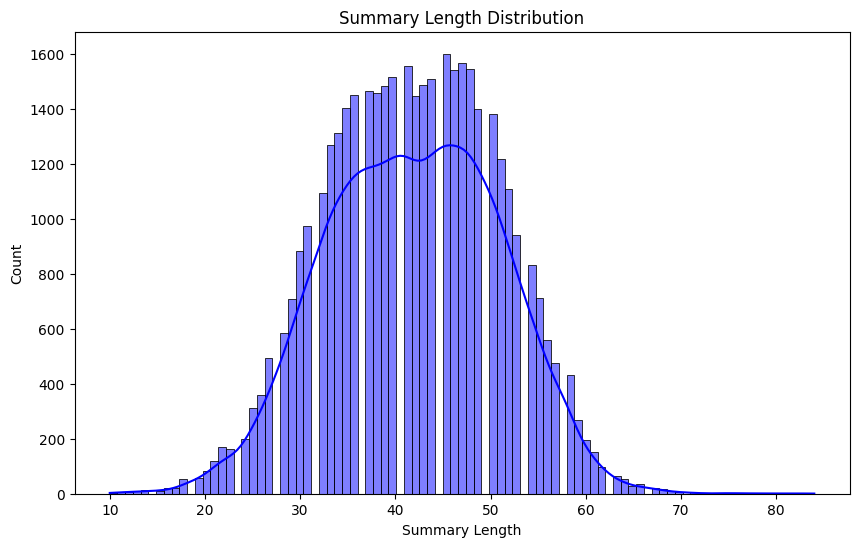

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import seaborn
import plotly.express as px
from wordcloud import WordCloud

# lets plot the distribution of article length
plt.figure(figsize=(10, 6))
seaborn.histplot(data['article_len'], kde=True, color='blue')
plt.title('Article Length Distribution')
plt.xlabel('Article Length')
plt.ylabel('Count')
plt.show()
#save fig to file
plt.savefig('plots/article_length_distribution.png')


# lets plot the distribution of summary length
plt.figure(figsize=(10, 6))
seaborn.histplot(data['summary_len'], kde=True, color='blue')
plt.title('Summary Length Distribution')
plt.xlabel('Summary Length')
plt.ylabel('Count')
plt.show()
# save fig to file
plt.savefig('plots/summary_length_distribution.png')



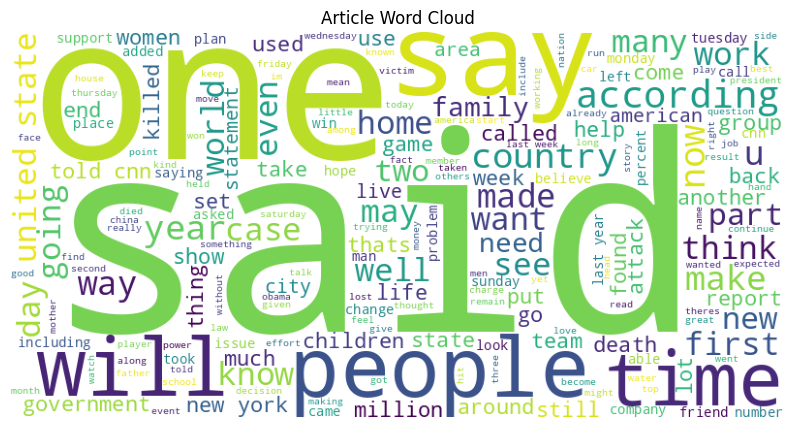

<Figure size 640x480 with 0 Axes>

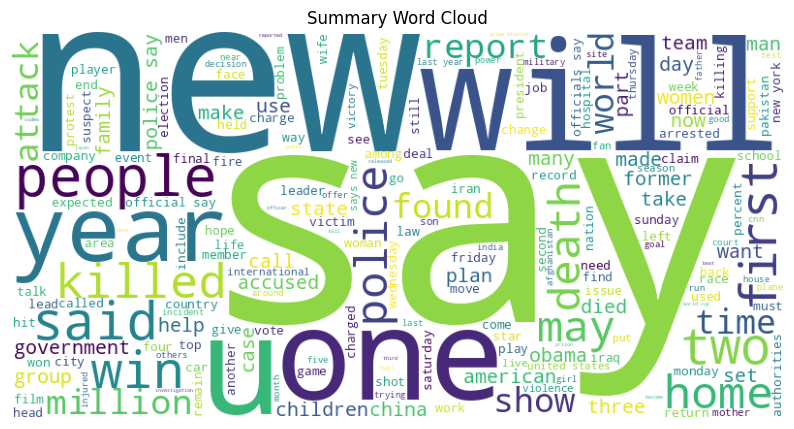

<Figure size 640x480 with 0 Axes>

In [13]:
# lets plot the word cloud of articles
article_text = ' '.join(data['article'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(article_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Article Word Cloud')
plt.show()
#save fig on plots folder with name wordcloud_article.png
plt.savefig('plots/wordcloud_article.png')


# lets plot the word cloud of summaries
summary_text = ' '.join(data['summary'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(summary_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Summary Word Cloud')
plt.show()
#save fig on plots folder with name wordcloud_summary.png
plt.savefig('plots/wordcloud_summary.png')


In [15]:
# Now lets do some common nlp methods

# spacy: plot summary entities
#install 'en_core_web_sm' model
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')
def plot_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

data['summary_entities'] = data['summary'].apply(lambda x: plot_entities(str(x)))
data['summary_entities'].head()


Python(82729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.3 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


0    [(harry potter, PERSON), (daniel radcliffe, PERSON), (20, CARDINAL), (18 monday, DATE), (first, ORDINAL), (five, CARDINAL)]
1                                                        [(miami, GPE), (steven leifman, PERSON), (cnn, ORG), (leifman, PERSON)]
2                            [(half, CARDINAL), (30 35foot, QUANTITY), (minnesota bridge, FAC), (hour, TIME), (wednesday, DATE)]
3                                                                                             [(five, CARDINAL), (bush, PERSON)]
4                                                          [(nfl, ORG), (atlanta, GPE), (michael vicks, PERSON), (monday, DATE)]
Name: summary_entities, dtype: object